In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('/Users/revu/Desktop/DATA SCIENCE/WA_Fn-UseC_-Telco-Customer-Churn 3.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
columns=df.columns.tolist()
columns
for i in columns:
    print(i,df[i].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [9]:
for i in columns[1:18]:
    print(i,df[i].value_counts())

gender gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup OnlineBackup
No                     3088
Yes                    2429
No internet

In [10]:
df.drop(columns = ['customerID'],axis=1, inplace=True)

In [11]:
df.shape

(7043, 20)

In [12]:
df.select_dtypes(include='object').nunique()

gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
df.select_dtypes(exclude='object').nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
dtype: int64

In [14]:
list1 = df['TotalCharges'].values.tolist()
list2 = []
for i in list1:
    if i.strip():  # Check if the string is not empty
        list2.append(float(i))
    else:
        list2.append(0.0)
df['TotalCharges']=list2

In [15]:
df.select_dtypes(include='object').nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [16]:
df.select_dtypes(exclude='object').nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6531
dtype: int64

## Exploratory Data Analysis

In [17]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
len(cat_vars),cat_vars

(16,
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'])

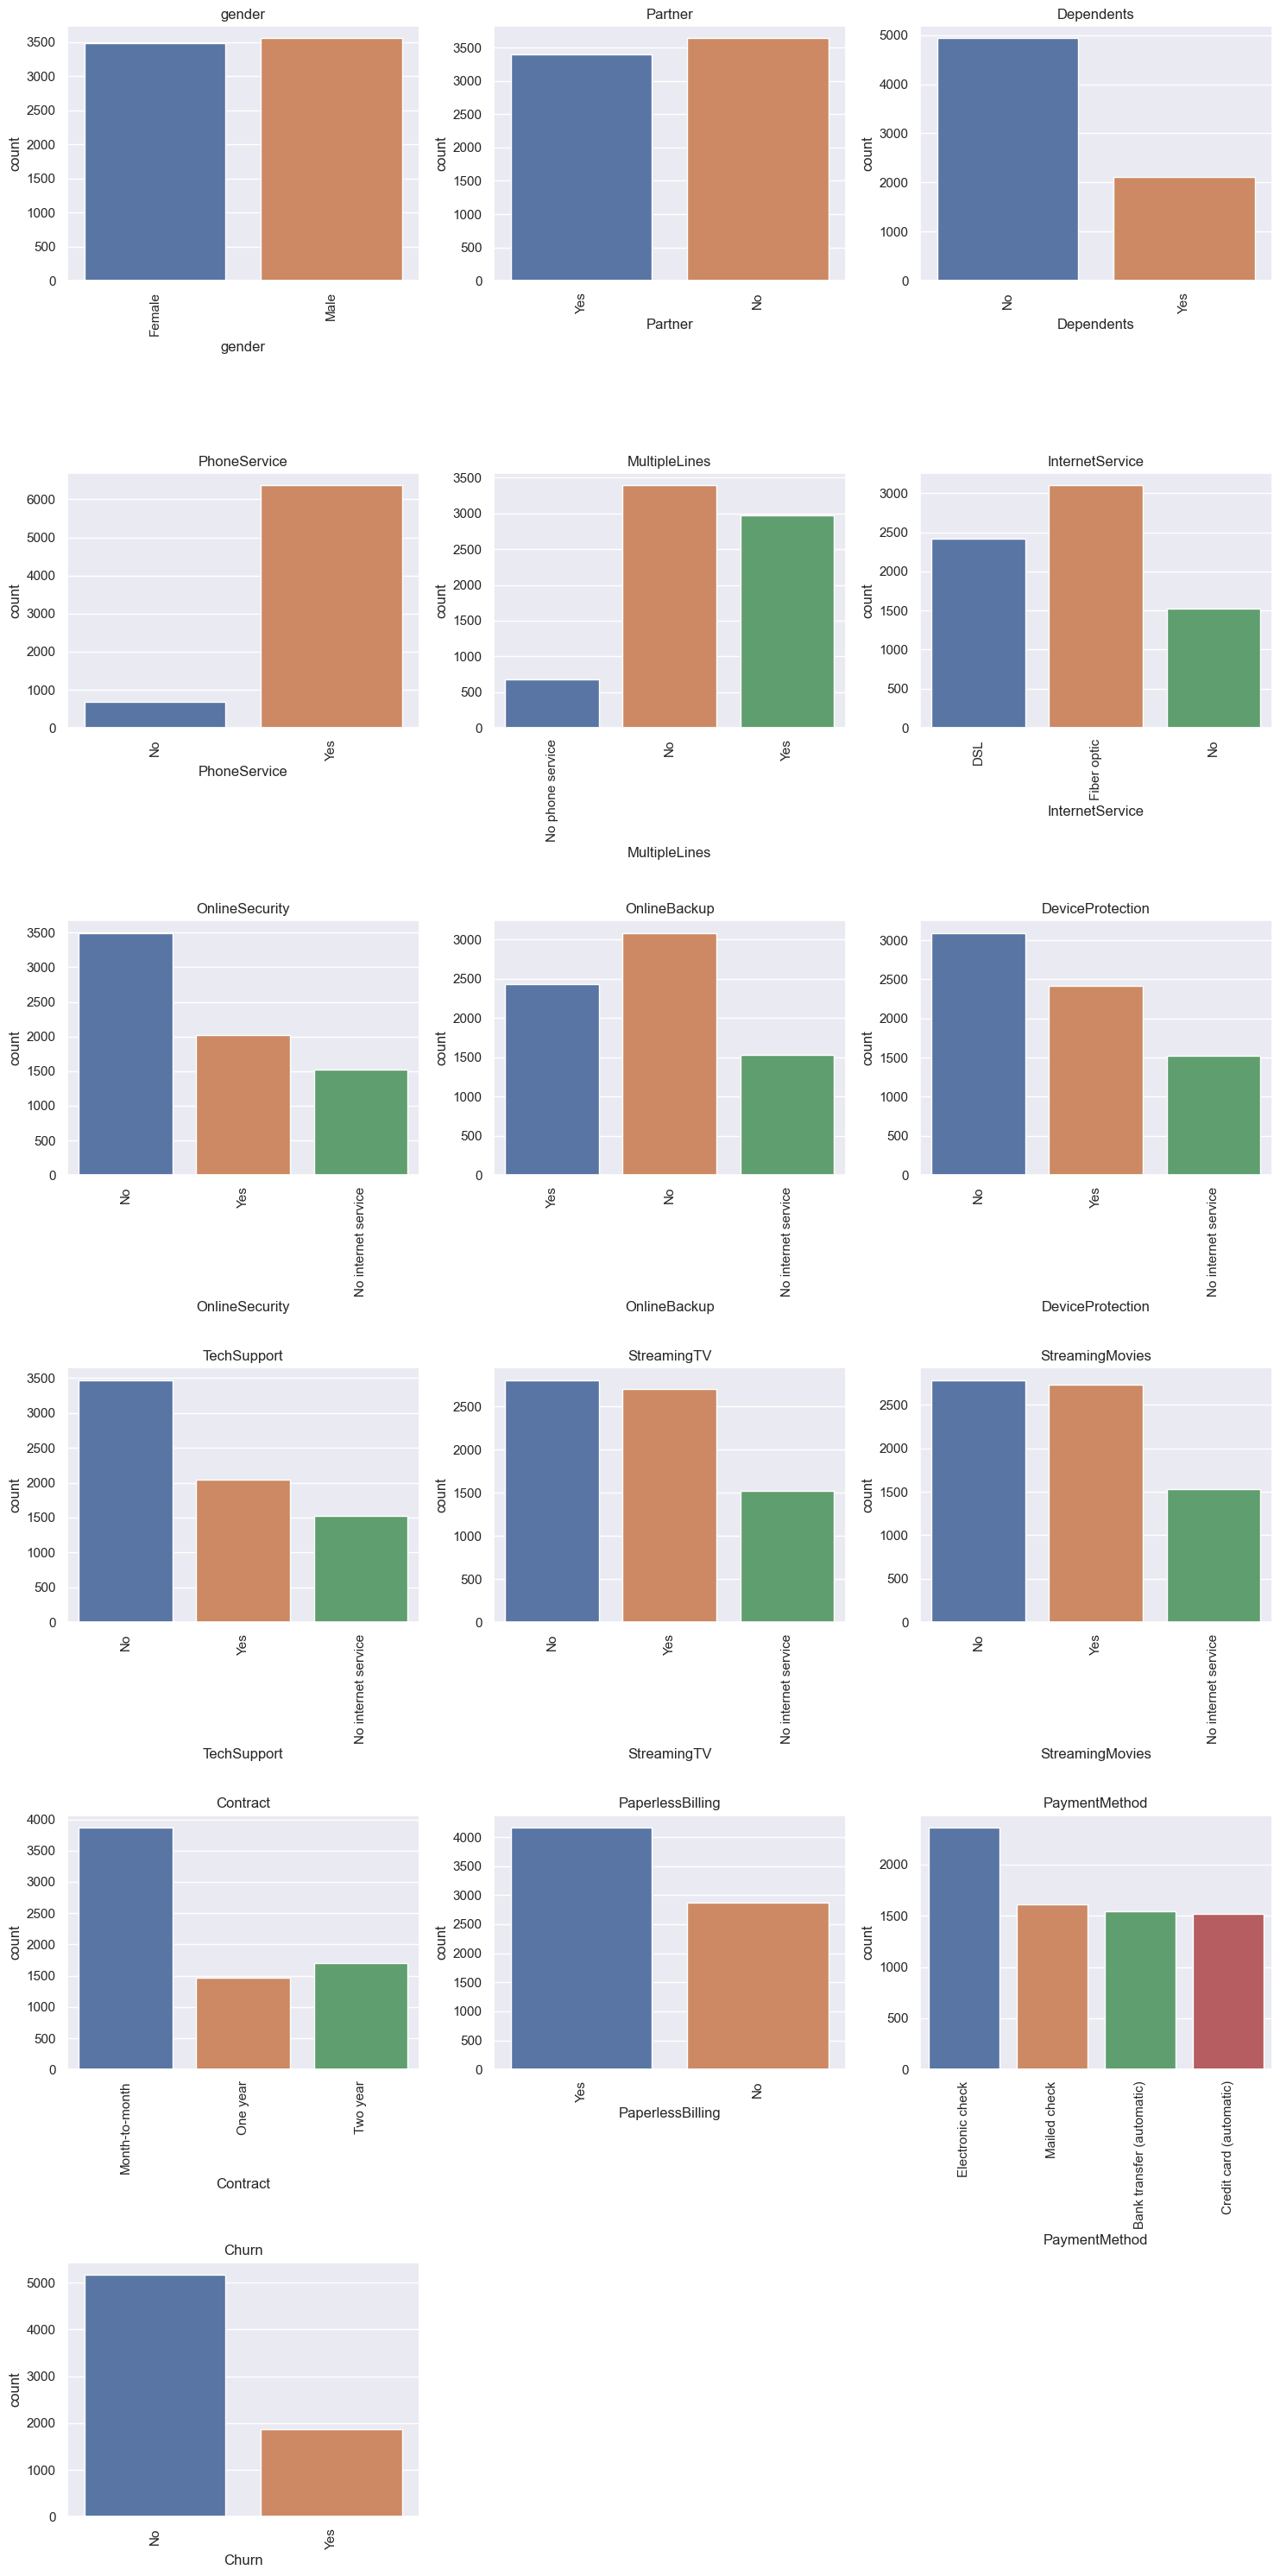

In [18]:
# Get the names of all columns with data type 'object' (categorical columns)

cat_vars=df.select_dtypes(include=['object']).columns.tolist()
num_cols=len(cat_vars)
num_rows=(num_cols+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(cat_vars):
    top_values=df[item].value_counts().nlargest(6).index
    filtered_df=df[df[item].isin(top_values)]
    sns.countplot(data=filtered_df,x=item,ax=axs[i])
    axs[i].set_title(item)
    axs[i].tick_params(axis='x',rotation=90)
if len(axs)>num_cols:
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

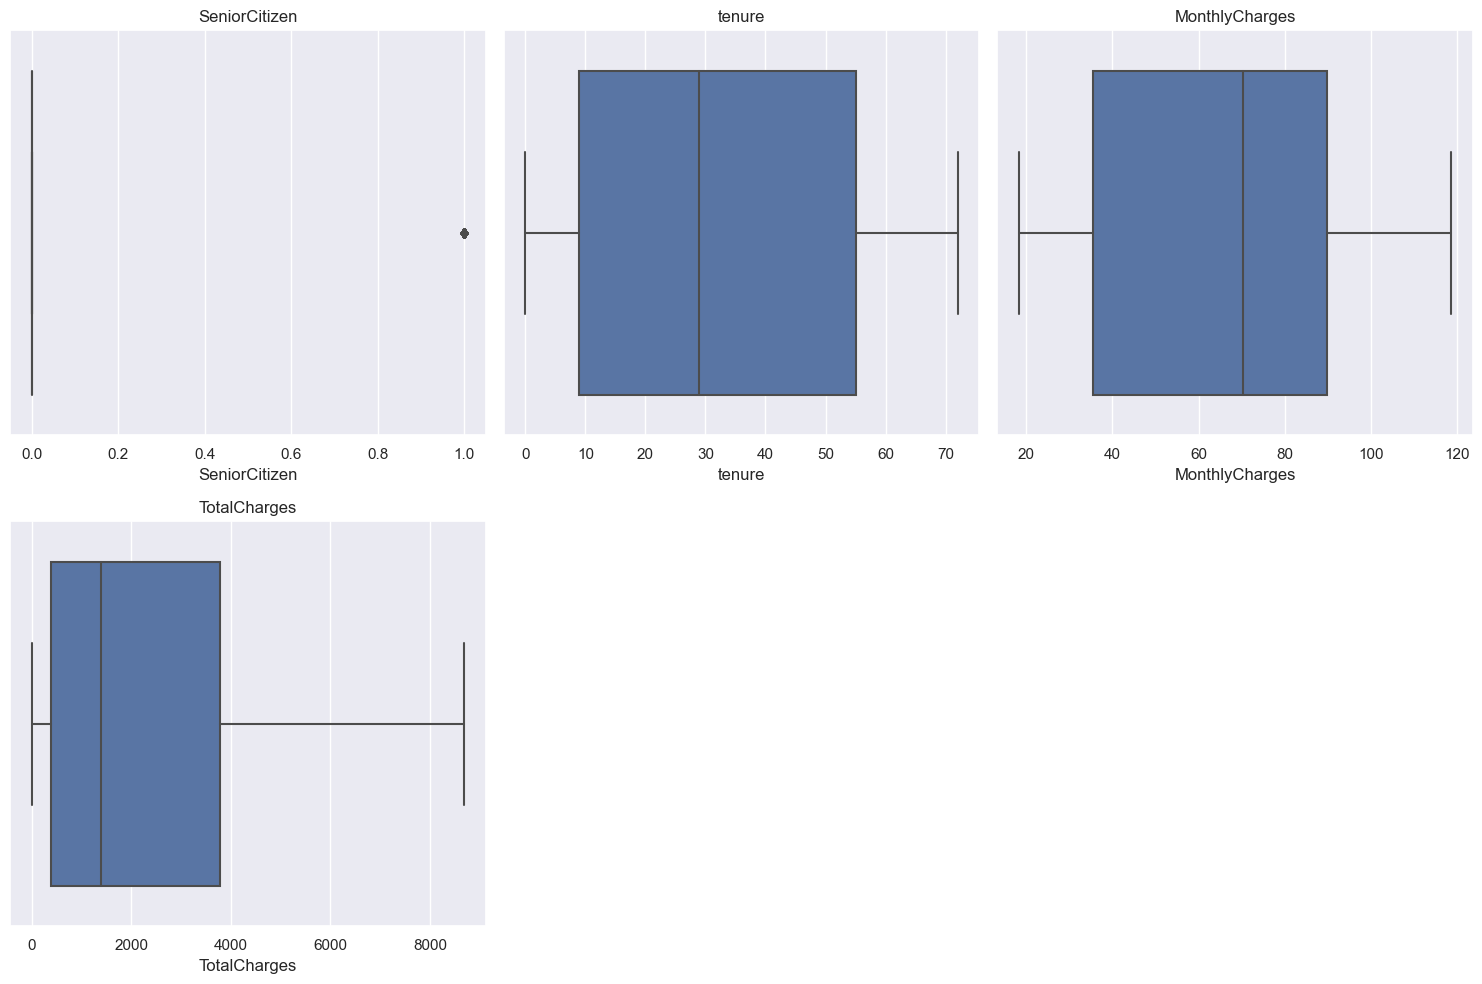

In [19]:
# Get the names of all columns with data type 'int' or 'float'
num_var=df.select_dtypes(exclude=['object']).columns.tolist()
num_col=len(num_var)
num_rows=(num_col+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()
for i, item in enumerate(num_var):
    sns.boxplot(data=df,x=item,ax=axs[i])
    axs[i].set_title(item)
if num_col<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

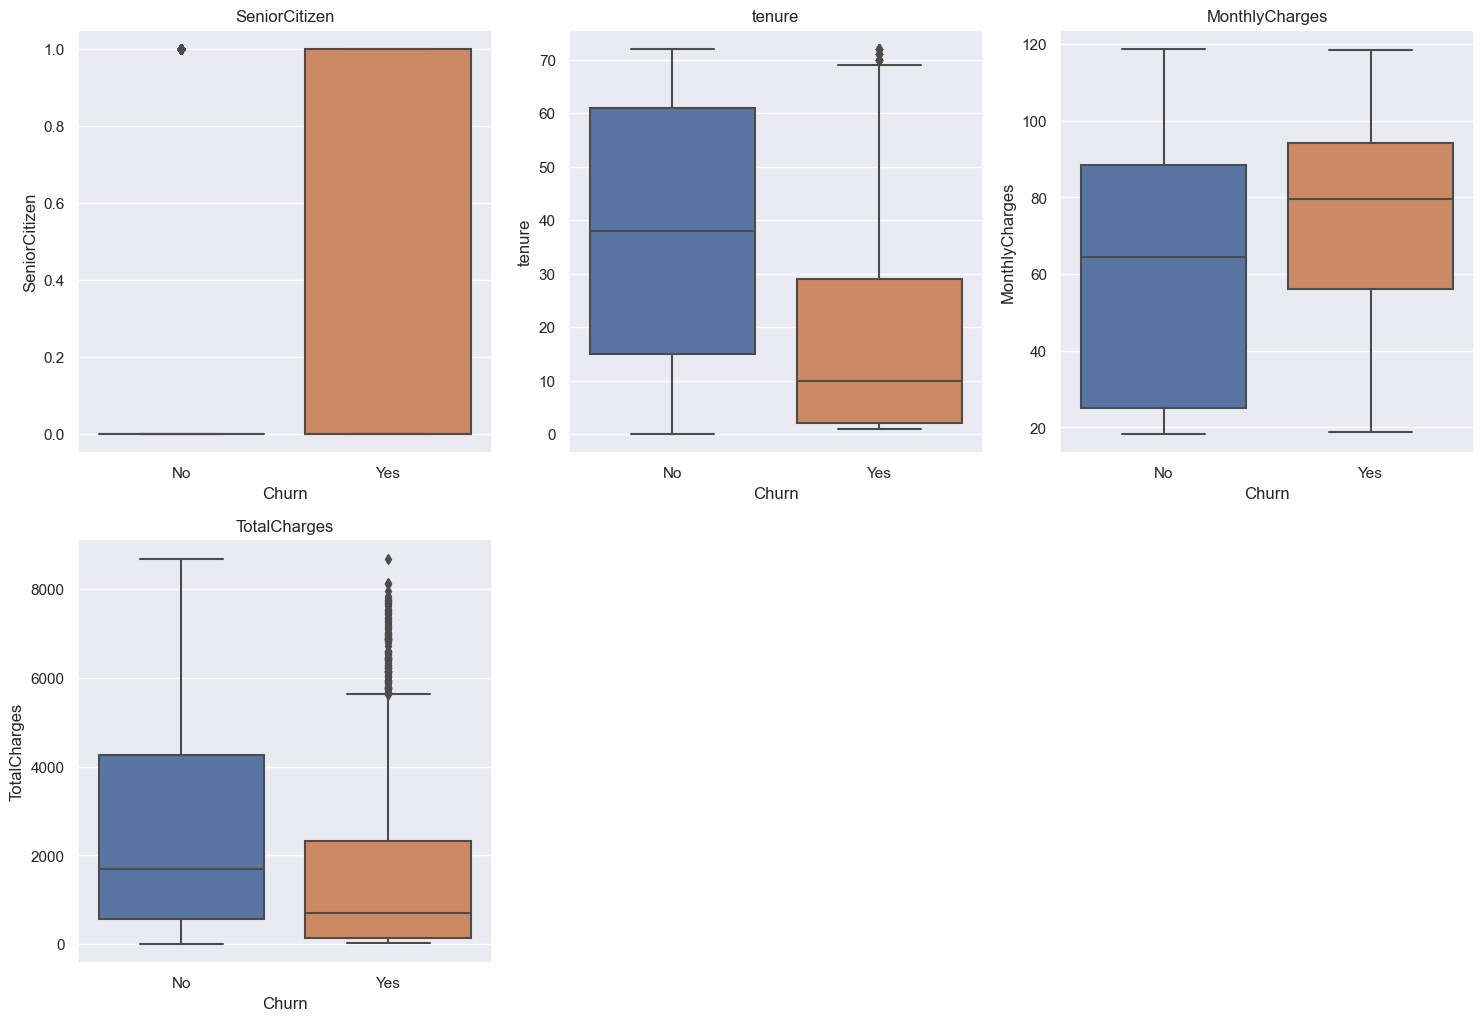

In [20]:
# Get the names of all columns with data type 'int'
num_var=df.select_dtypes(exclude=['object']).columns.tolist()
num_col=len(num_var)
num_rows=(num_col+2)//2
fig,axs=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(num_var):
    sns.boxplot(data=df,x='Churn',y=item,ax=axs[i])
    axs[i].set_title(item)
if num_col<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

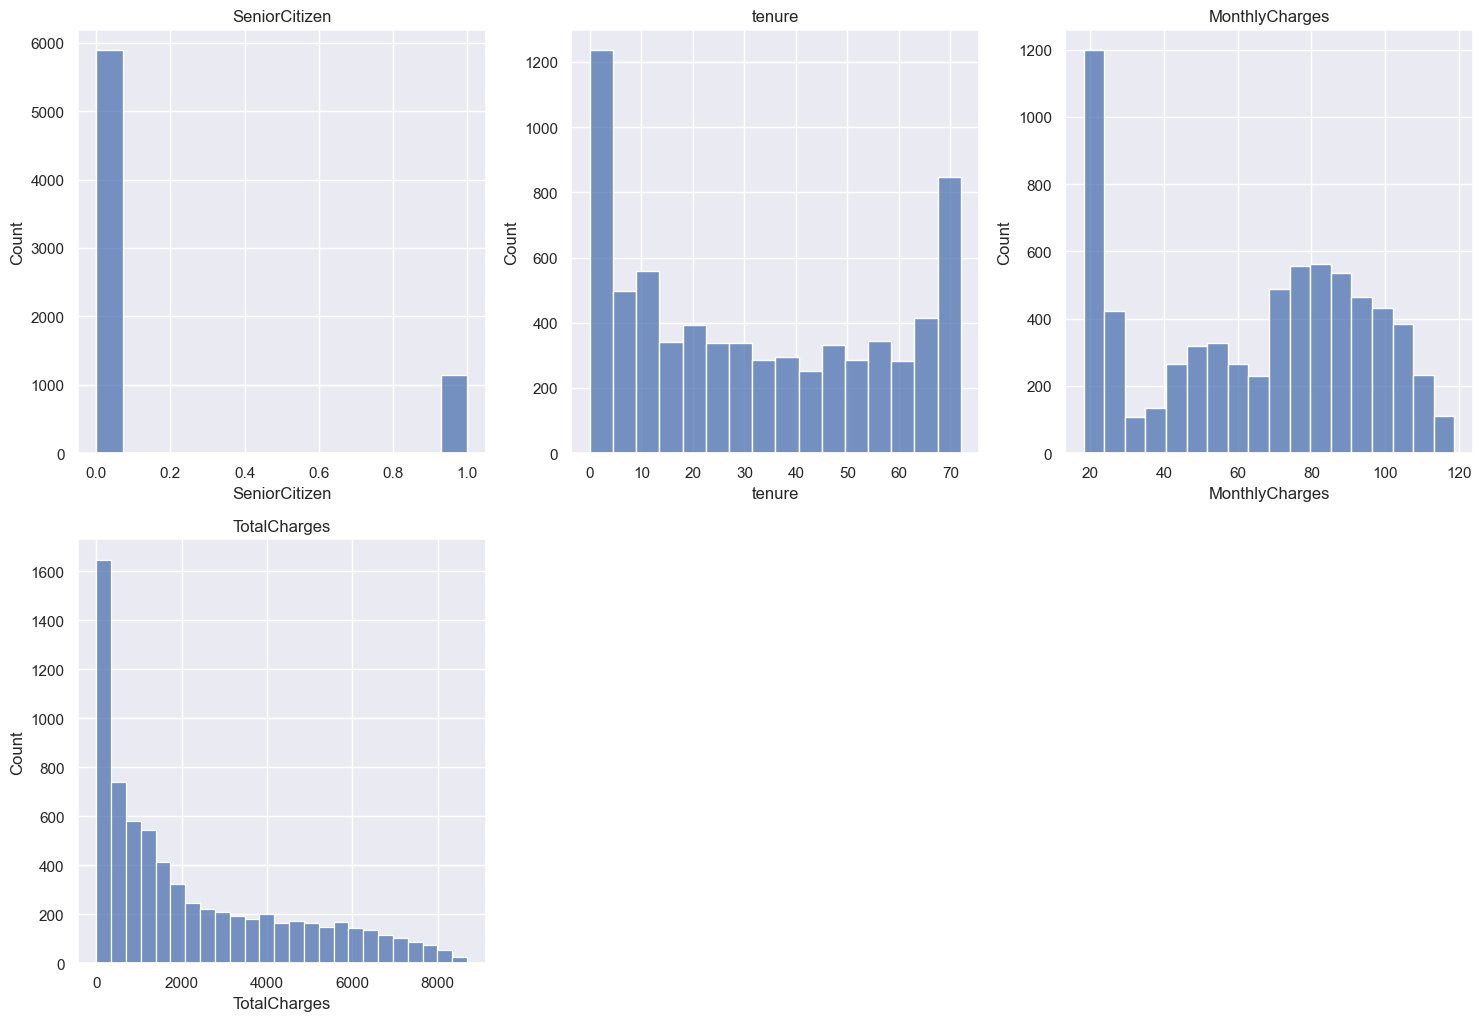

In [21]:
# Get the names of all columns with data type 'int'
num_var=df.select_dtypes(exclude=['object']).columns.tolist()
num_col=len(num_var)
num_rows=(num_col+2)//2
fig,axs=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(num_var):
    sns.histplot(data=df,x=item,ax=axs[i])
    axs[i].set_title(item)
if num_col<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

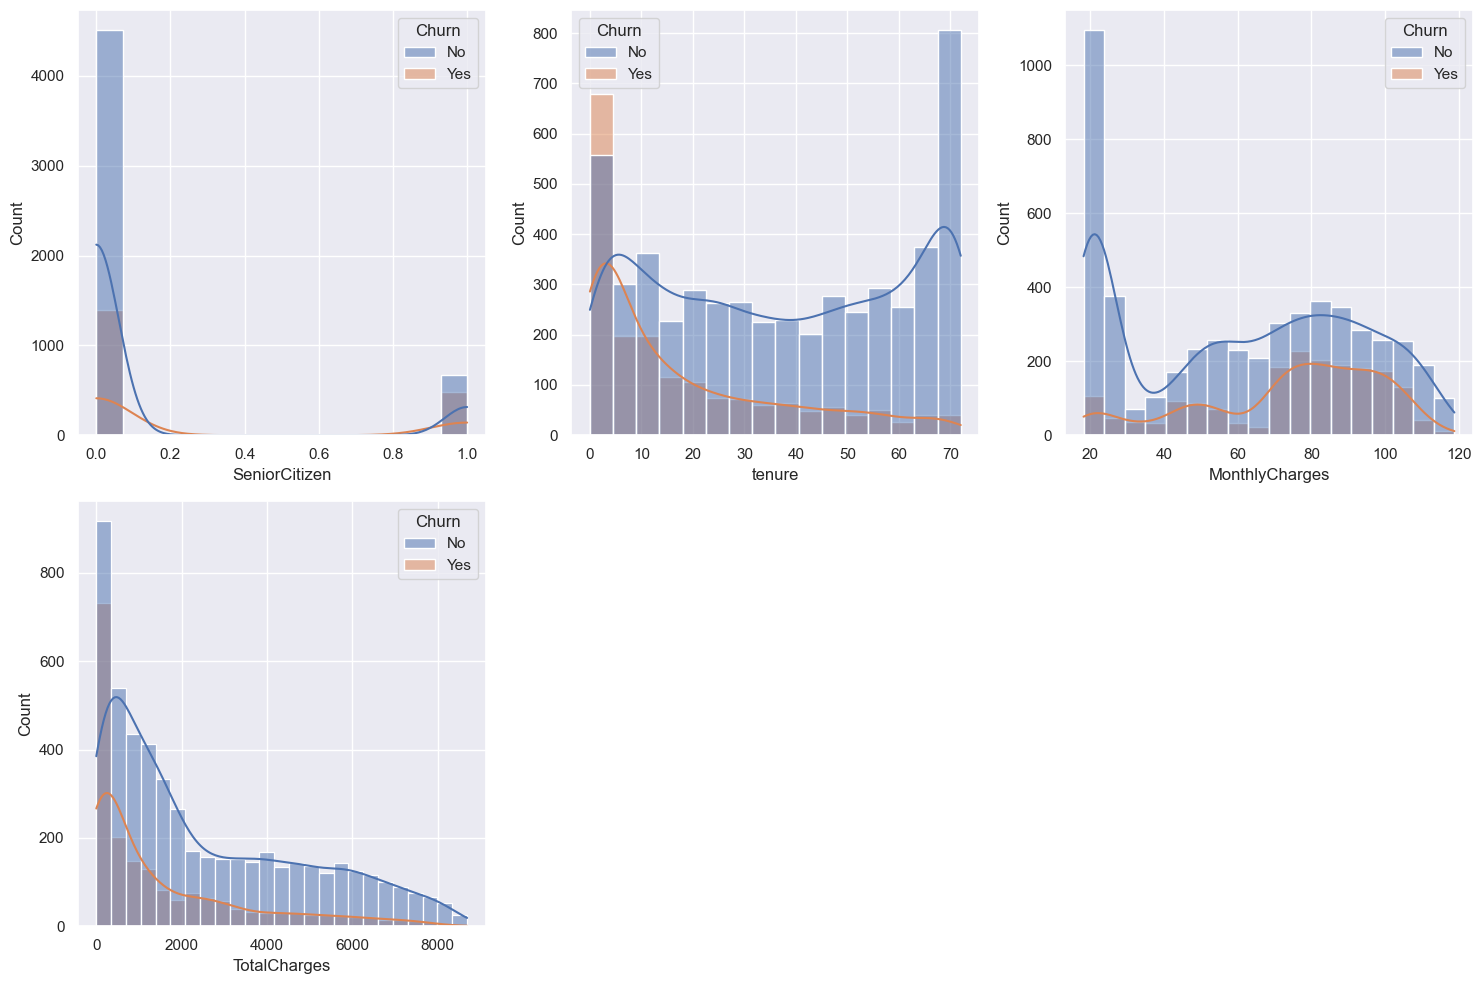

In [22]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i,item in enumerate(int_vars):
    sns.histplot(data=df,x=item,hue='Churn',kde=True,ax=axs[i])
if num_cols<len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()


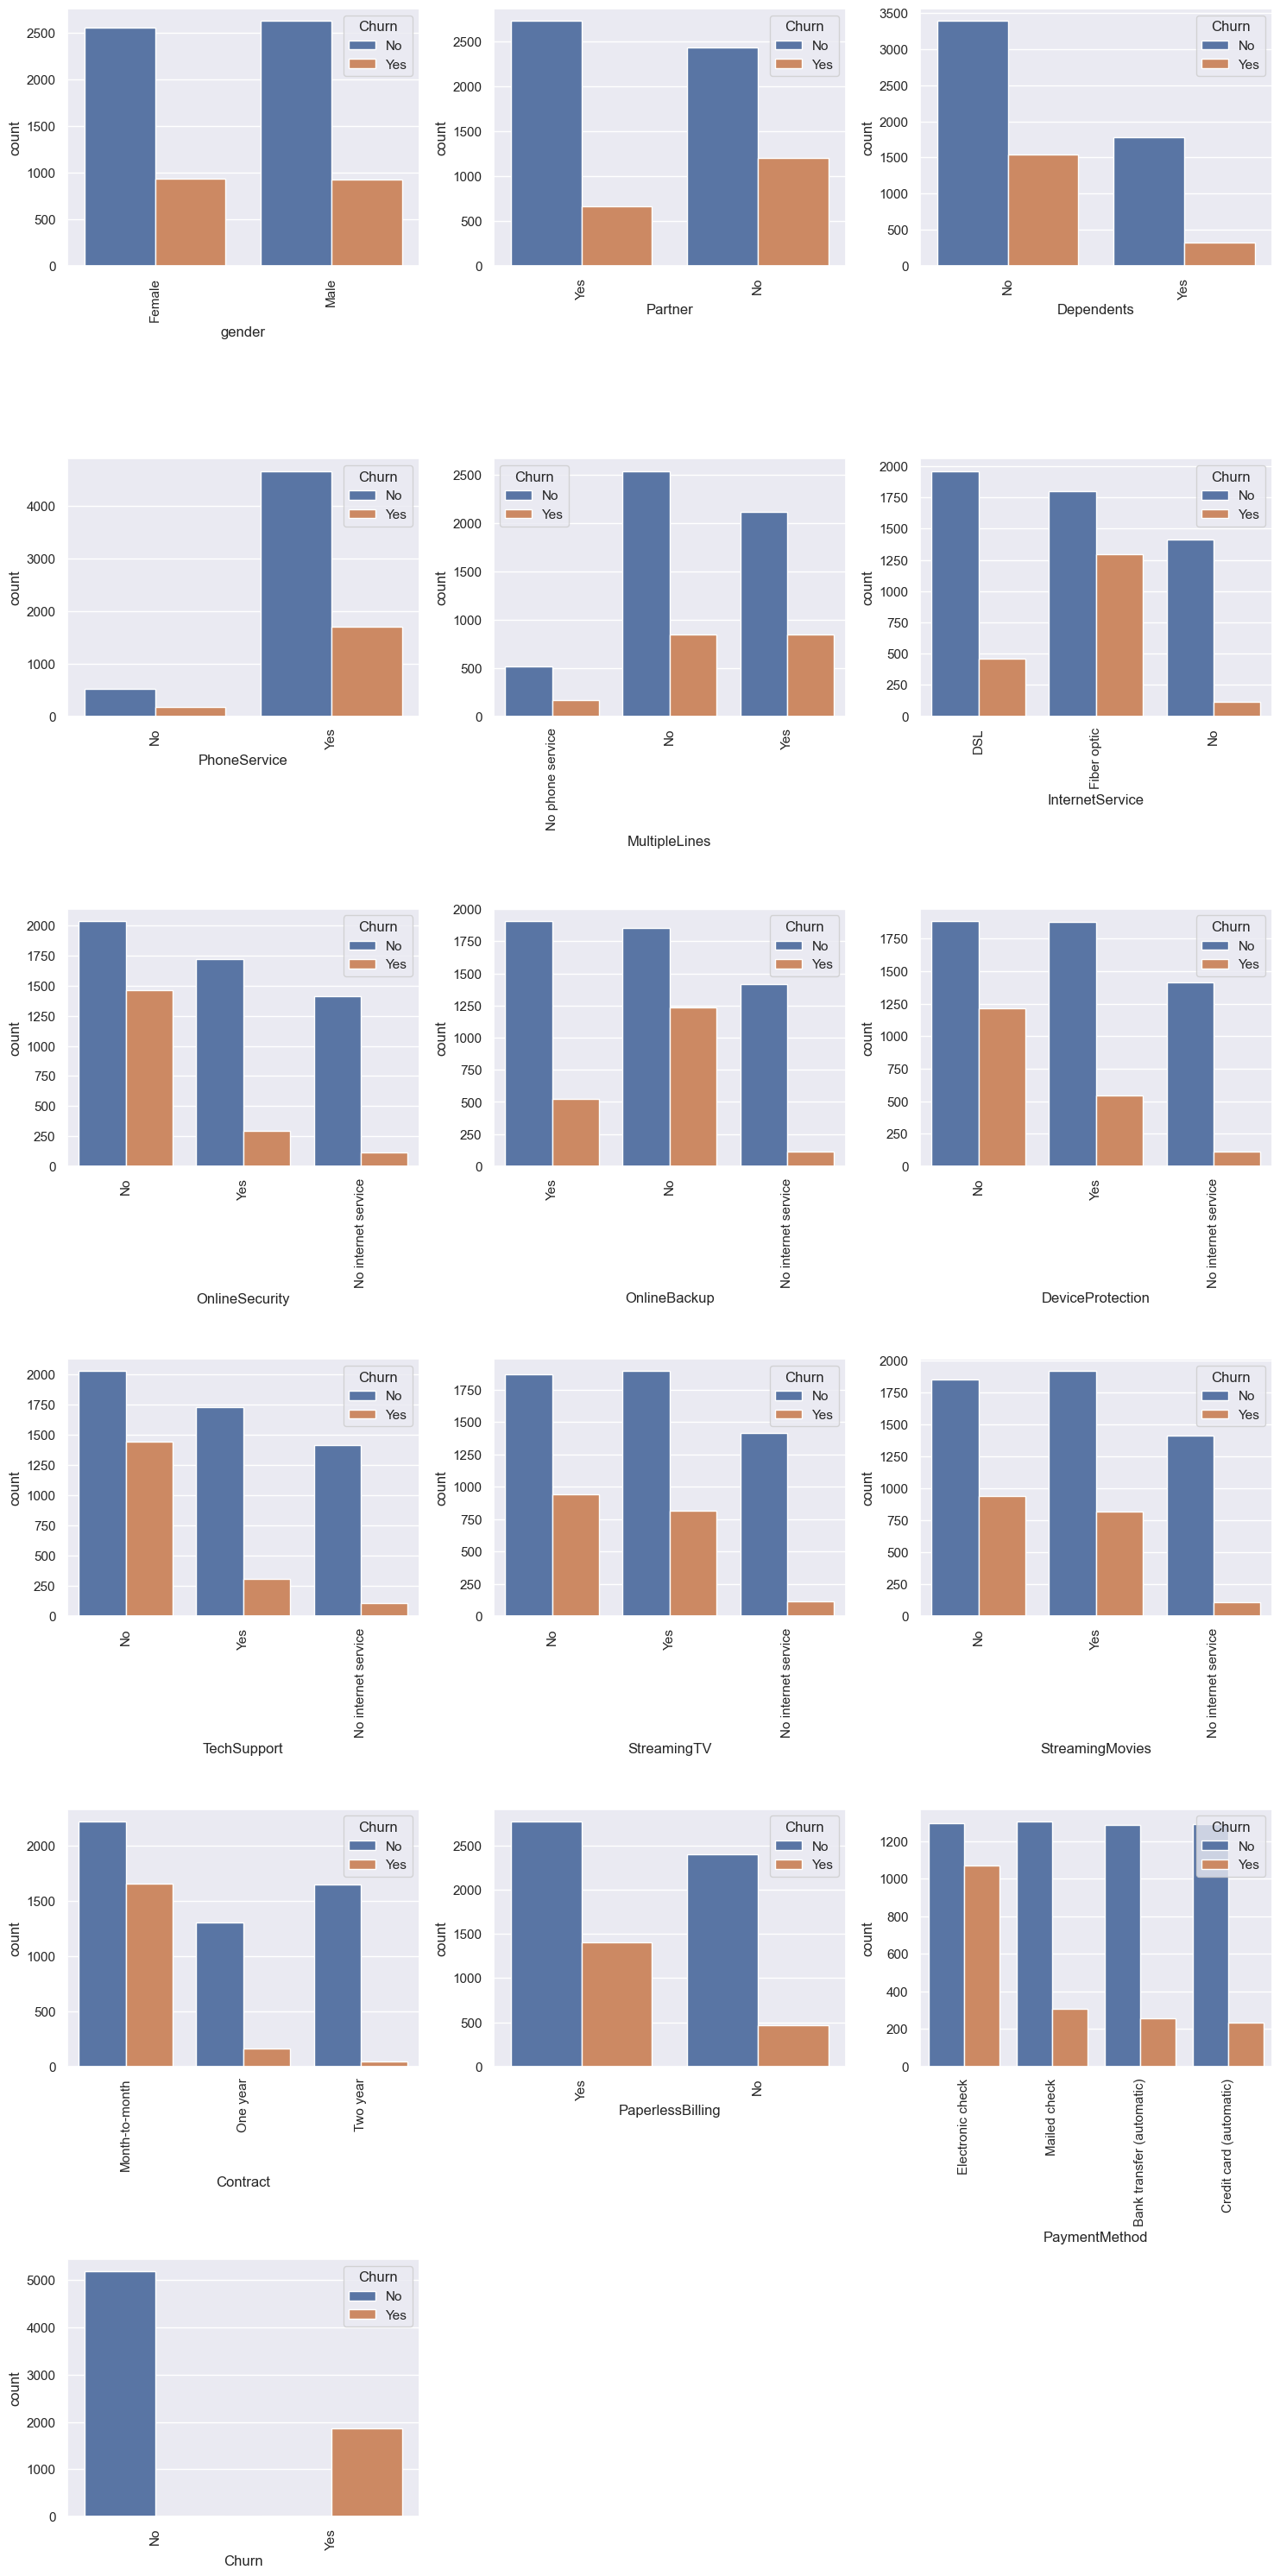

In [23]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i,item in enumerate(cat_vars):
    top_value=df[item].value_counts().nlargest(6).index
    filter_df=df[df[item].isin(top_value)]
    sns.countplot(data=filter_df,x=filter_df[item],hue='Churn',ax=axs[i])
    axs[i].tick_params(axis='x',rotation=90)

for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()   

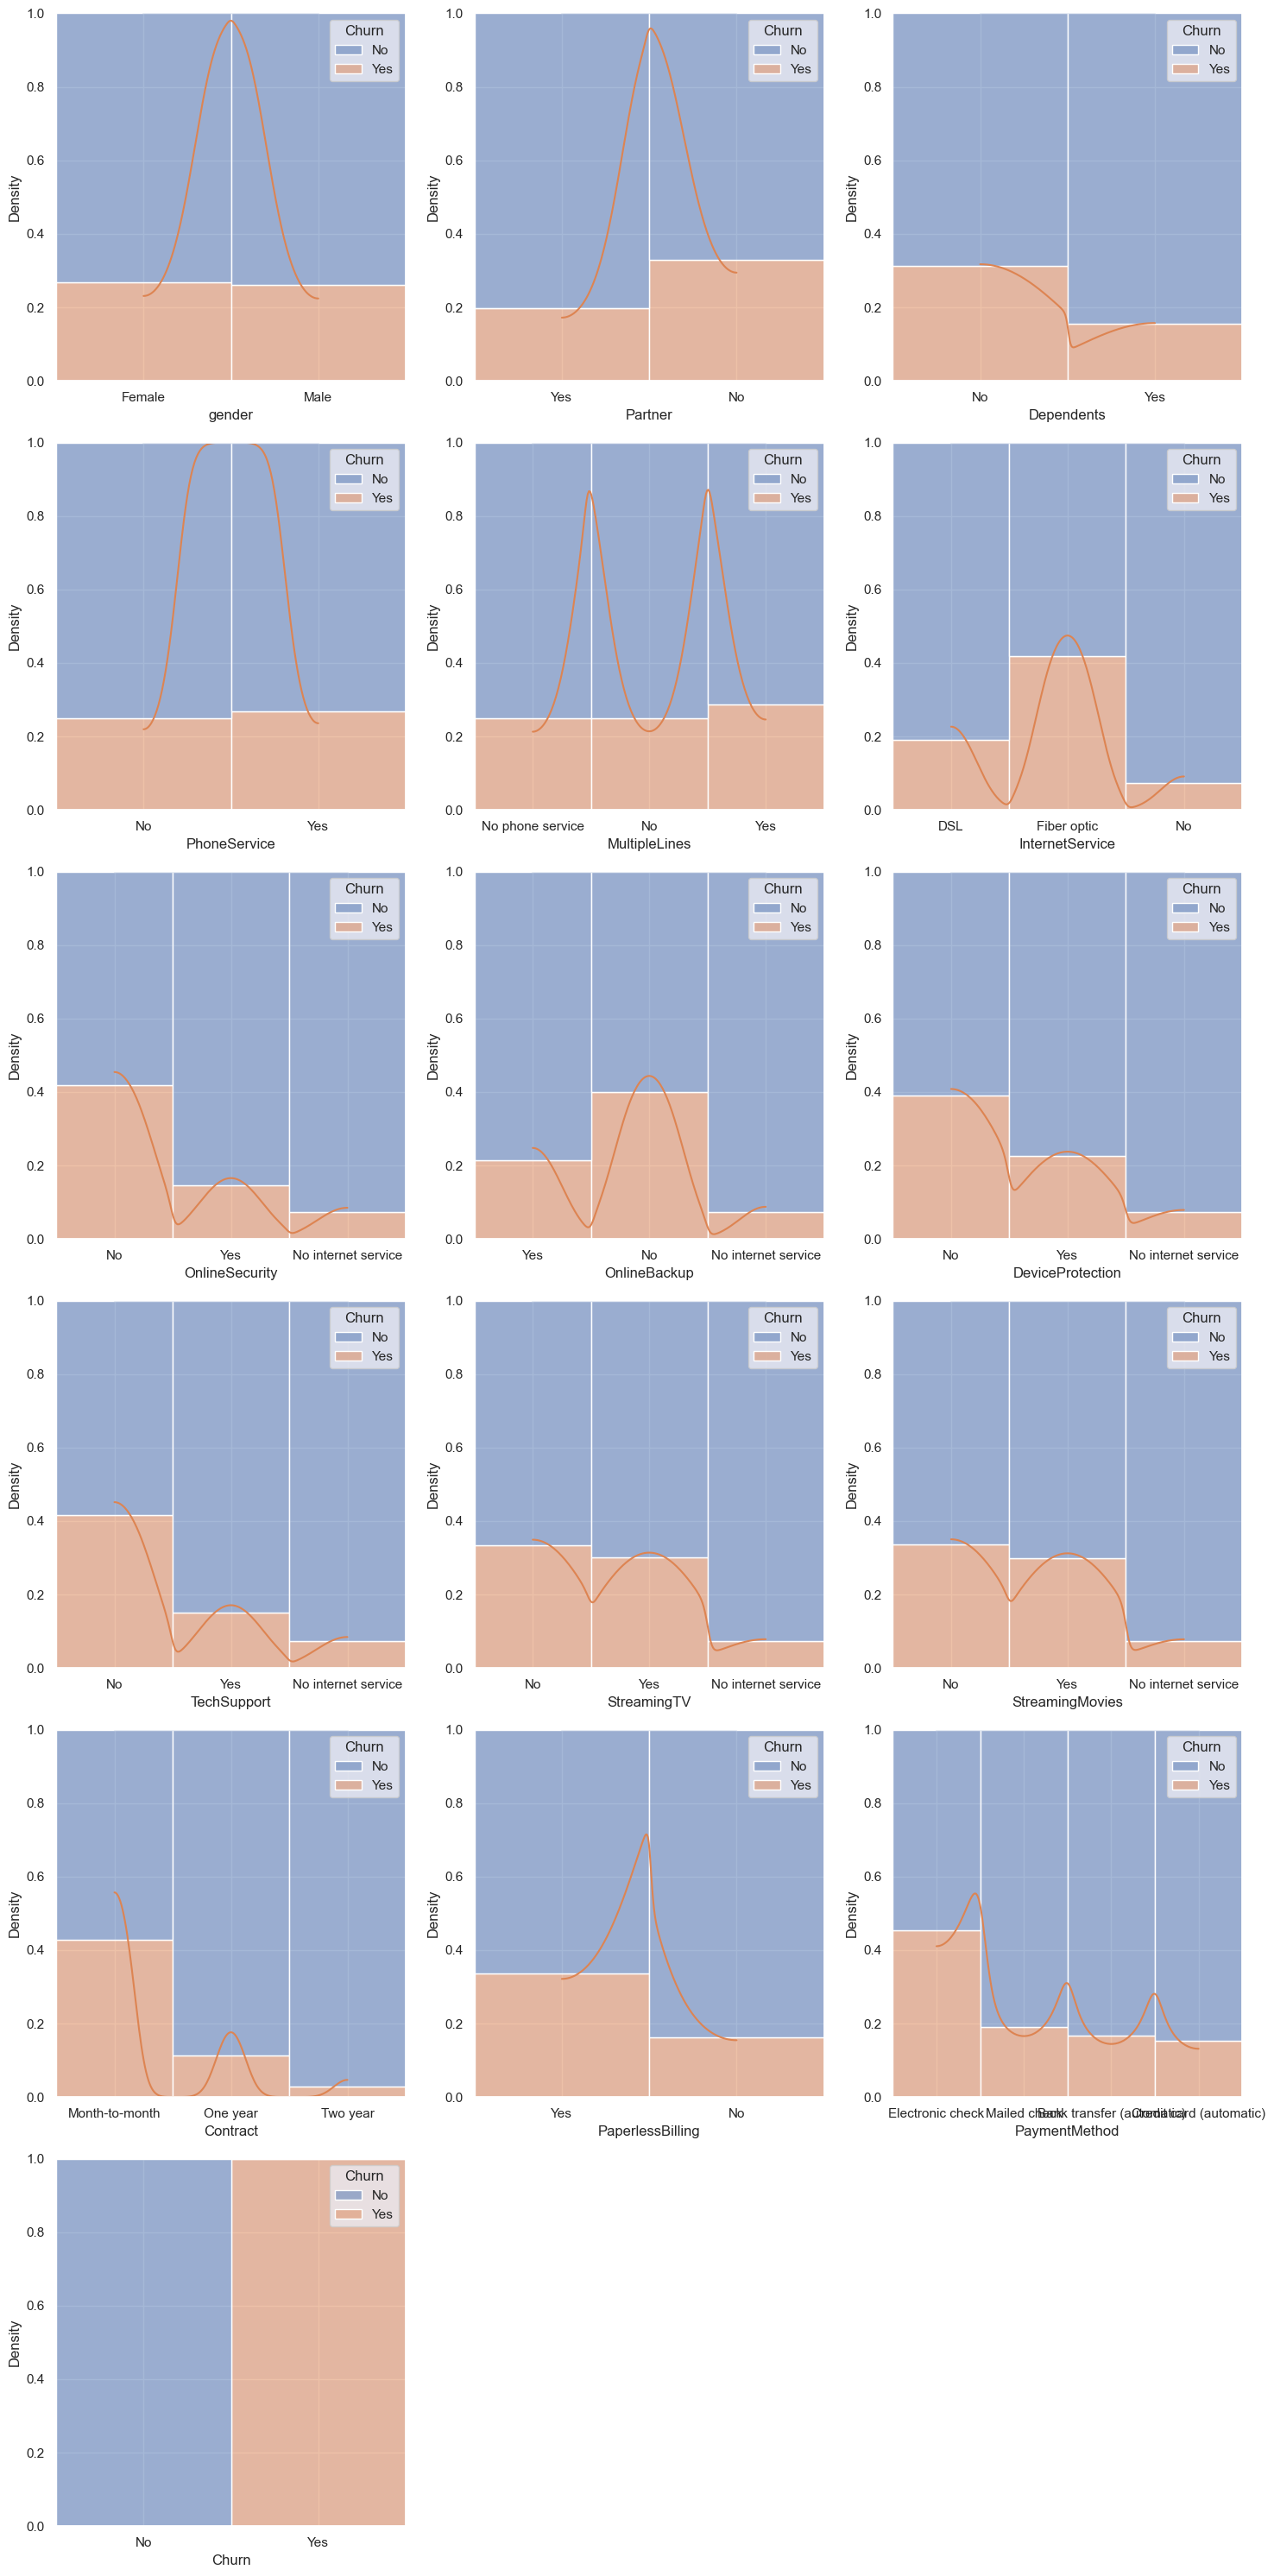

In [24]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Customer Status' in cat_vars:
    cat_vars.remove('Customer Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.histplot(x=var, hue='Churn', data=filtered_df, ax=axs[i], multiple="fill", kde=True, element="bars", fill=True, stat='density')
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

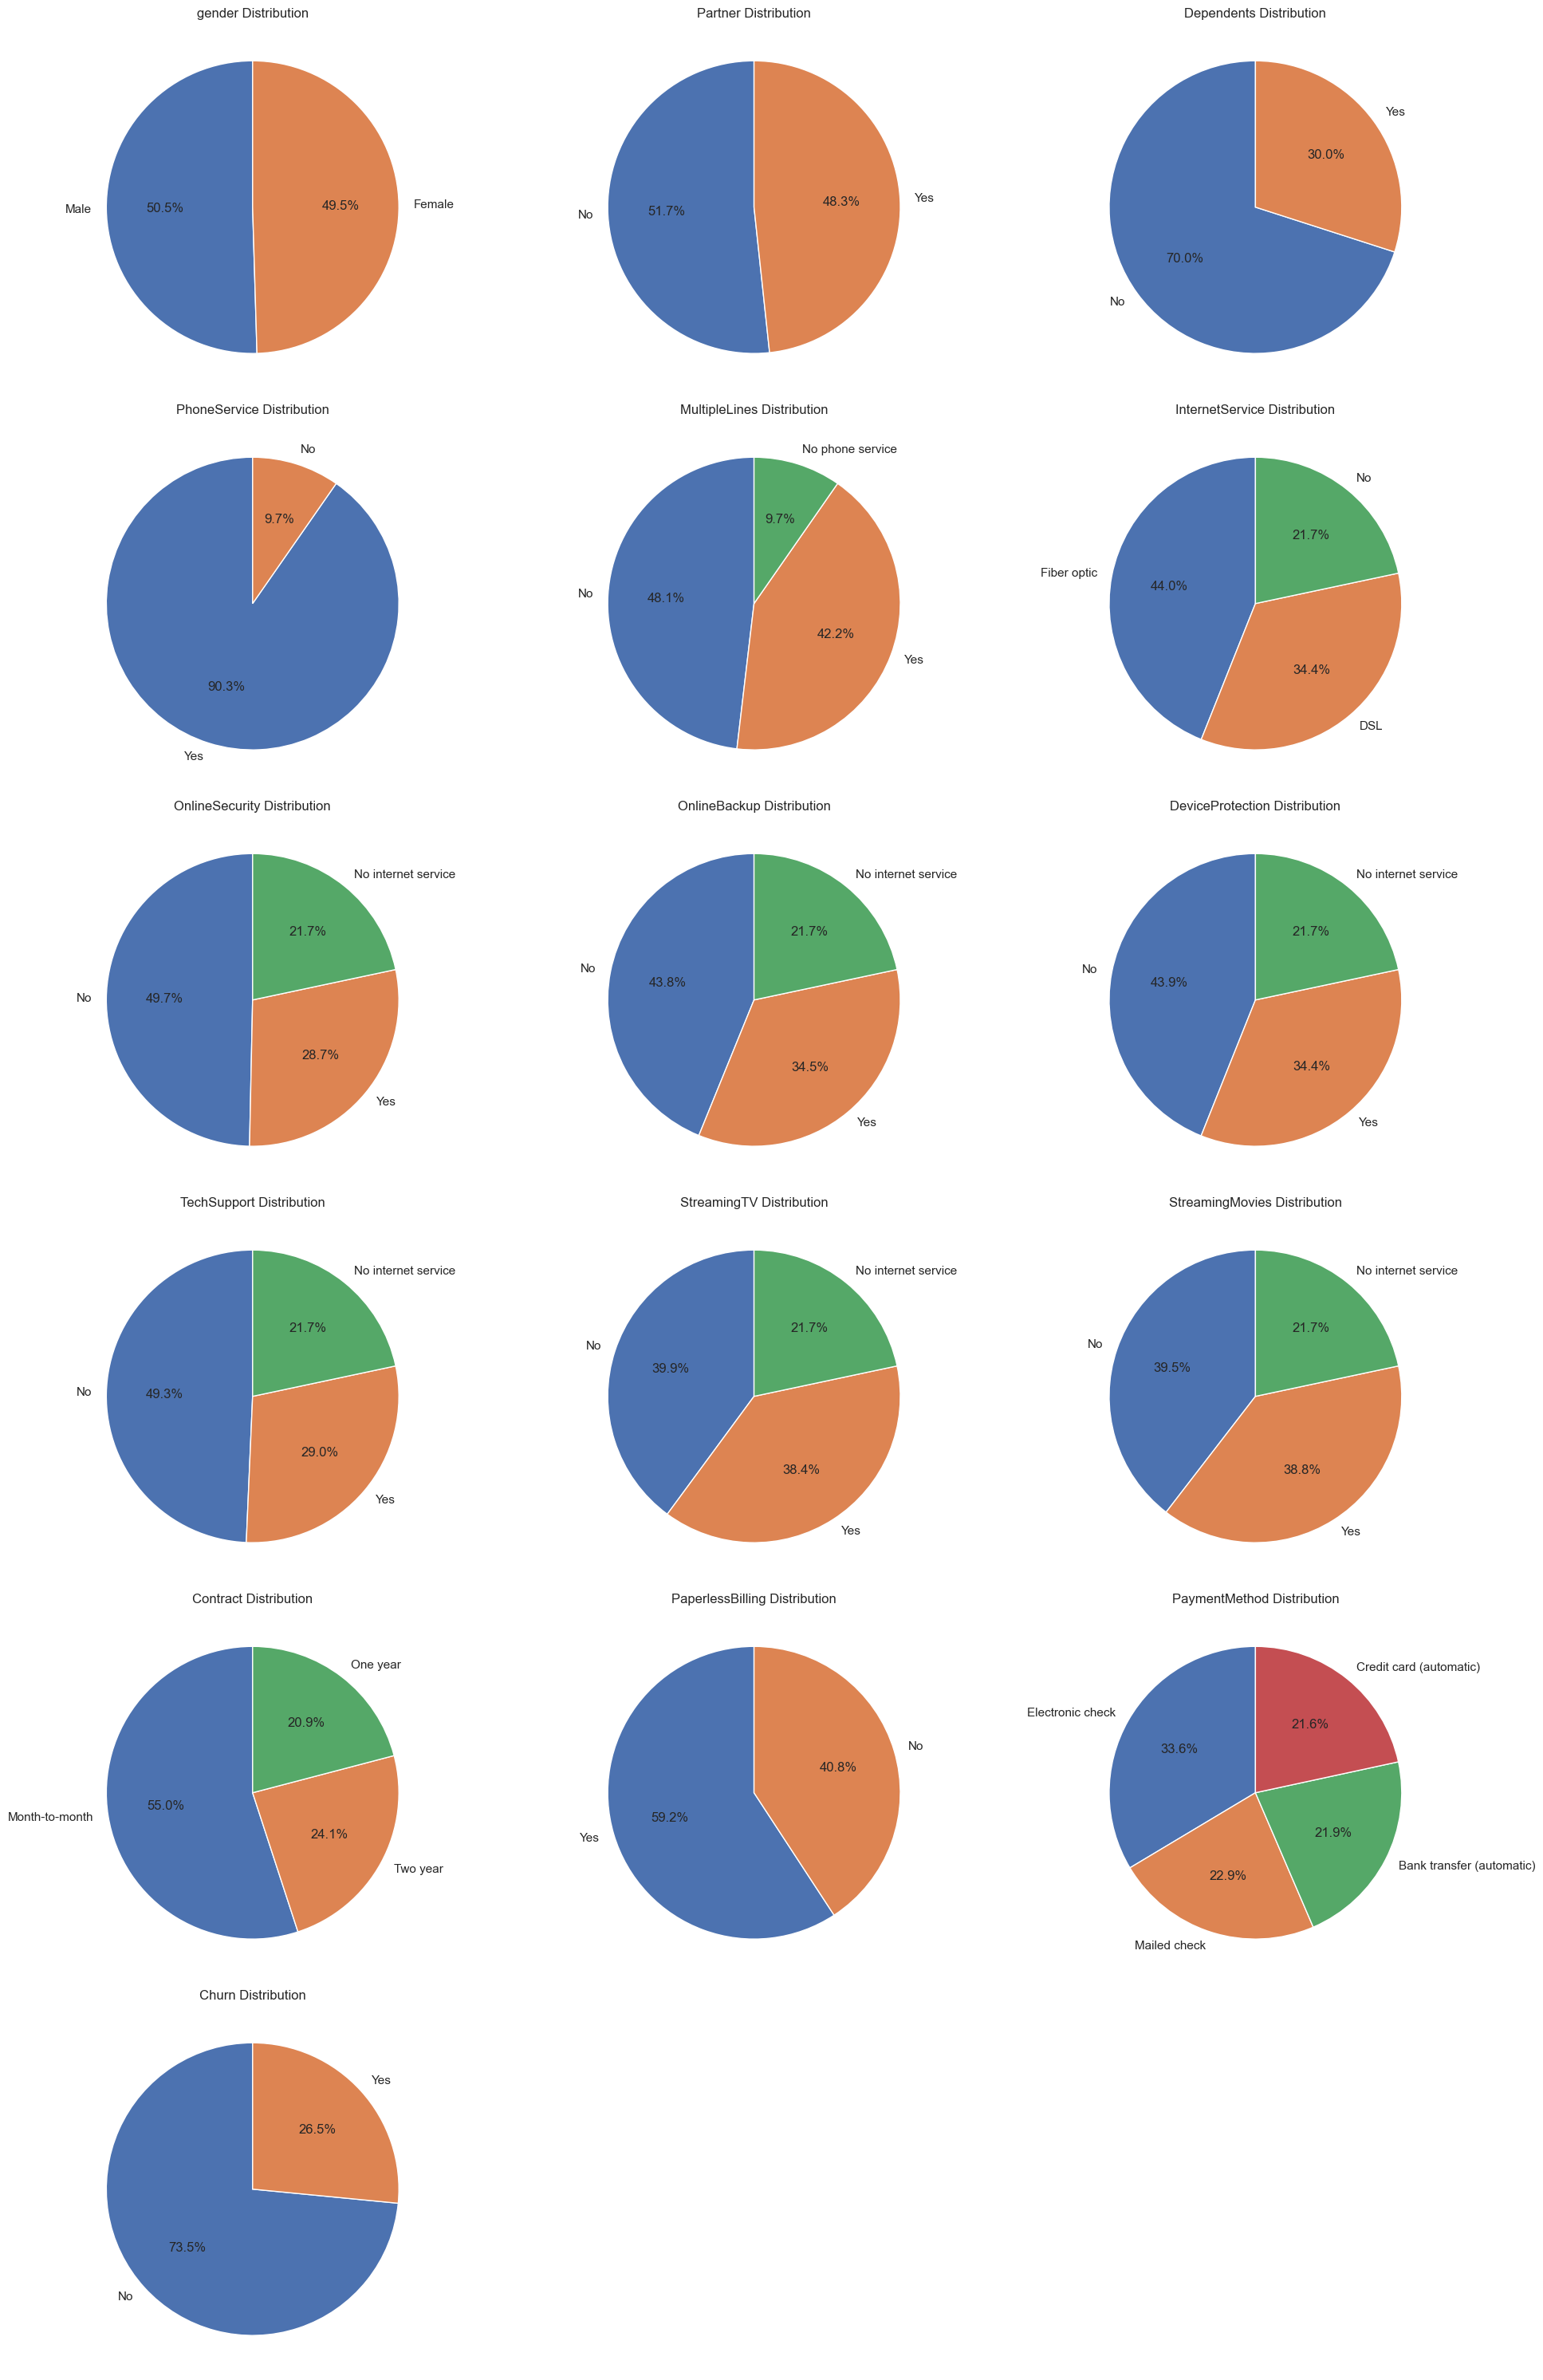

In [25]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])
        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

## Data Preprocessing Part 2

In [26]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA ======>for all numerical data

In [27]:
num_var=df.select_dtypes(exclude=['object']).columns.tolist()
for i in num_var:
    mean=round(np.mean(df[i]),2)
    std=round(np.std(df[i]),2)
    print(f"          *****************{i}******************")
    plus1=mean+std
    min1=mean-std
    con1=df[i]>min1
    con2=df[i]<plus1
    con=con1&con2
    per1=len(df[con1&con2])*100/len(df)
    print(f"{per1} of data falls within 1 standard deviation")
    plus1=mean+(2*std)
    min1=mean-(2*std)
    con1=df[i]>min1
    con2=df[i]<plus1
    con=con1&con2
    per1=len(df[con1&con2])*100/len(df)
    print(f"{per1} of data falls within 2 standard deviation")
    plus1=mean+(3*std)
    min1=mean-(3*std)
    con1=df[i]>min1
    con2=df[i]<plus1
    con=con1&con2
    per1=len(df[con1&con2])*100/len(df)
    print(f"{per1} of data falls within 3 standard deviation")
    print("*******************************************************************")

          *****************SeniorCitizen******************
83.78531875621184 of data falls within 1 standard deviation
83.78531875621184 of data falls within 2 standard deviation
100.0 of data falls within 3 standard deviation
*******************************************************************
          *****************tenure******************
53.32954706801079 of data falls within 1 standard deviation
100.0 of data falls within 2 standard deviation
100.0 of data falls within 3 standard deviation
*******************************************************************
          *****************MonthlyCharges******************
56.83657532301576 of data falls within 1 standard deviation
100.0 of data falls within 2 standard deviation
100.0 of data falls within 3 standard deviation
*******************************************************************
          *****************TotalCharges******************
80.49126792559989 of data falls within 1 standard deviation
94.40579298594349 of data f

In [28]:
for i in num_var:
    q1=round(np.percentile(df[i],25),2)
    q2=round(np.percentile(df[i],50),2)
    q3=round(np.percentile(df[i],75),2)
    iqr=q3-q1
    ub=q3+(1.5*iqr)
    lb=q1-(1.5*iqr)
    con1=df[i]>lb
    con2=df[i]<ub
    con=con1&con2
    per1=len(df[con1&con2])*100/len(df)
    print(f"          *****************{i}******************")
    print(f"{per1} of data falls within acceptable Inter quartile range")
    print("")
    

          *****************SeniorCitizen******************
0.0 of data falls within acceptable Inter quartile range

          *****************tenure******************
100.0 of data falls within acceptable Inter quartile range

          *****************MonthlyCharges******************
100.0 of data falls within acceptable Inter quartile range

          *****************TotalCharges******************
100.0 of data falls within acceptable Inter quartile range



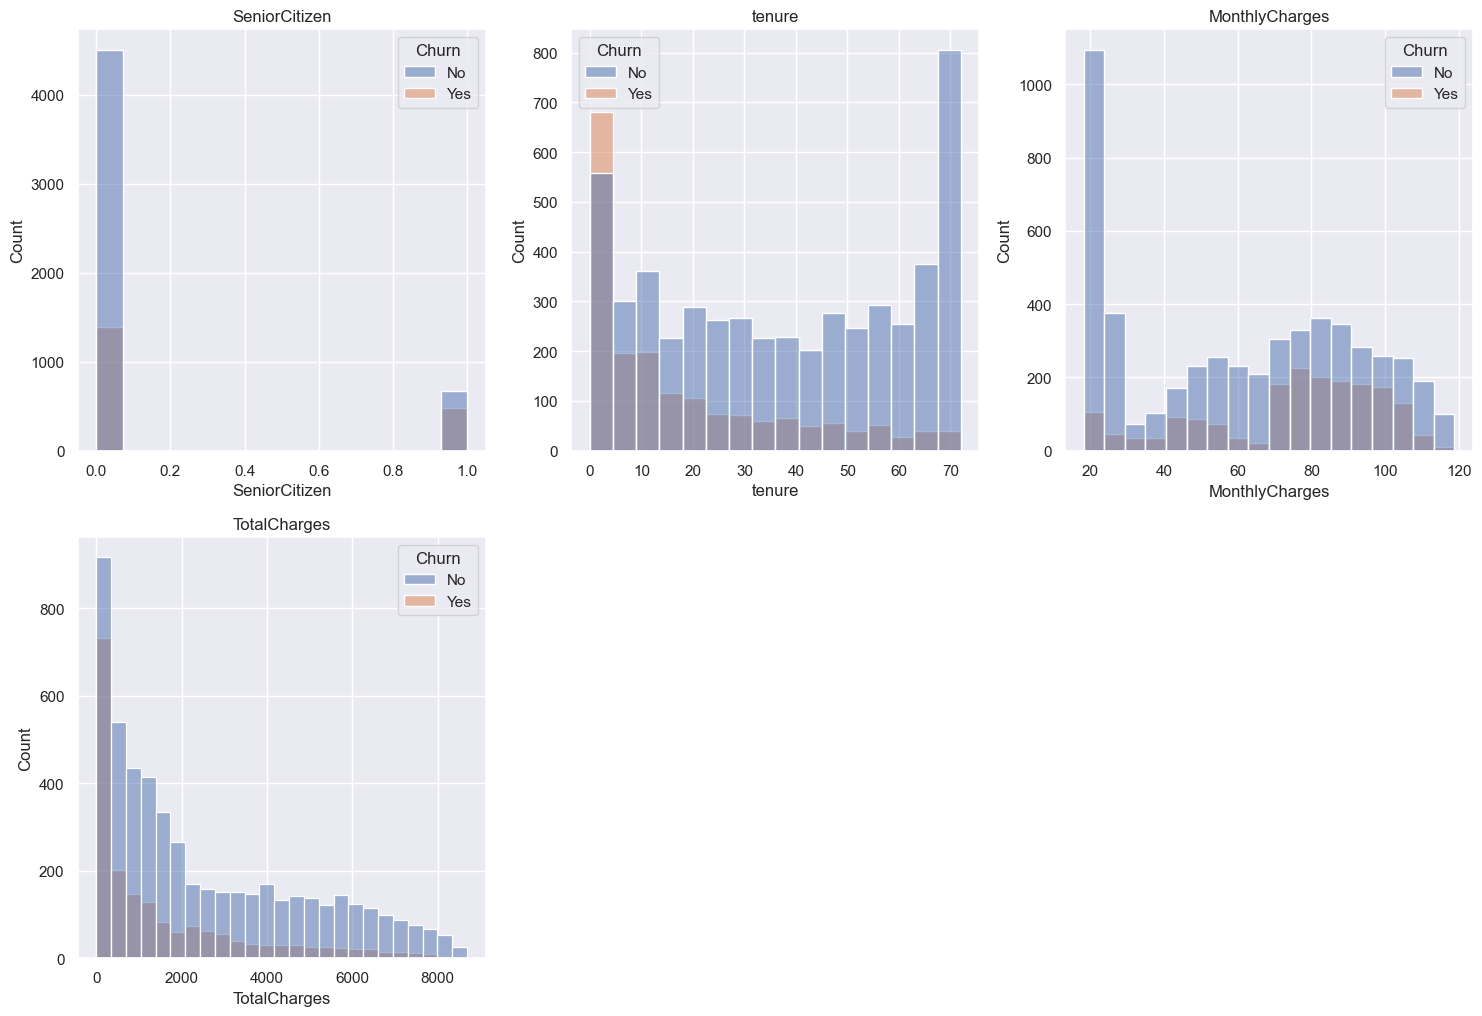

In [29]:
num=df.select_dtypes(exclude=['object']).columns.tolist()
num_cols=len(num)
num_rows=num_cols+2//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()
for i, item in enumerate(num):
    sns.histplot(data=df,x=item,ax=axs[i],hue='Churn',kde=False)
    axs[i].set_title(item)
if num_cols<len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

## Label Encoding for Object Datatypes

In [30]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=LE.fit_transform(df[col])
    print(f"{col}: {df[col].unique()}")

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
Churn: [0 1]


In [32]:
df.shape

(7043, 20)

In [33]:
corr=df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


<Axes: >

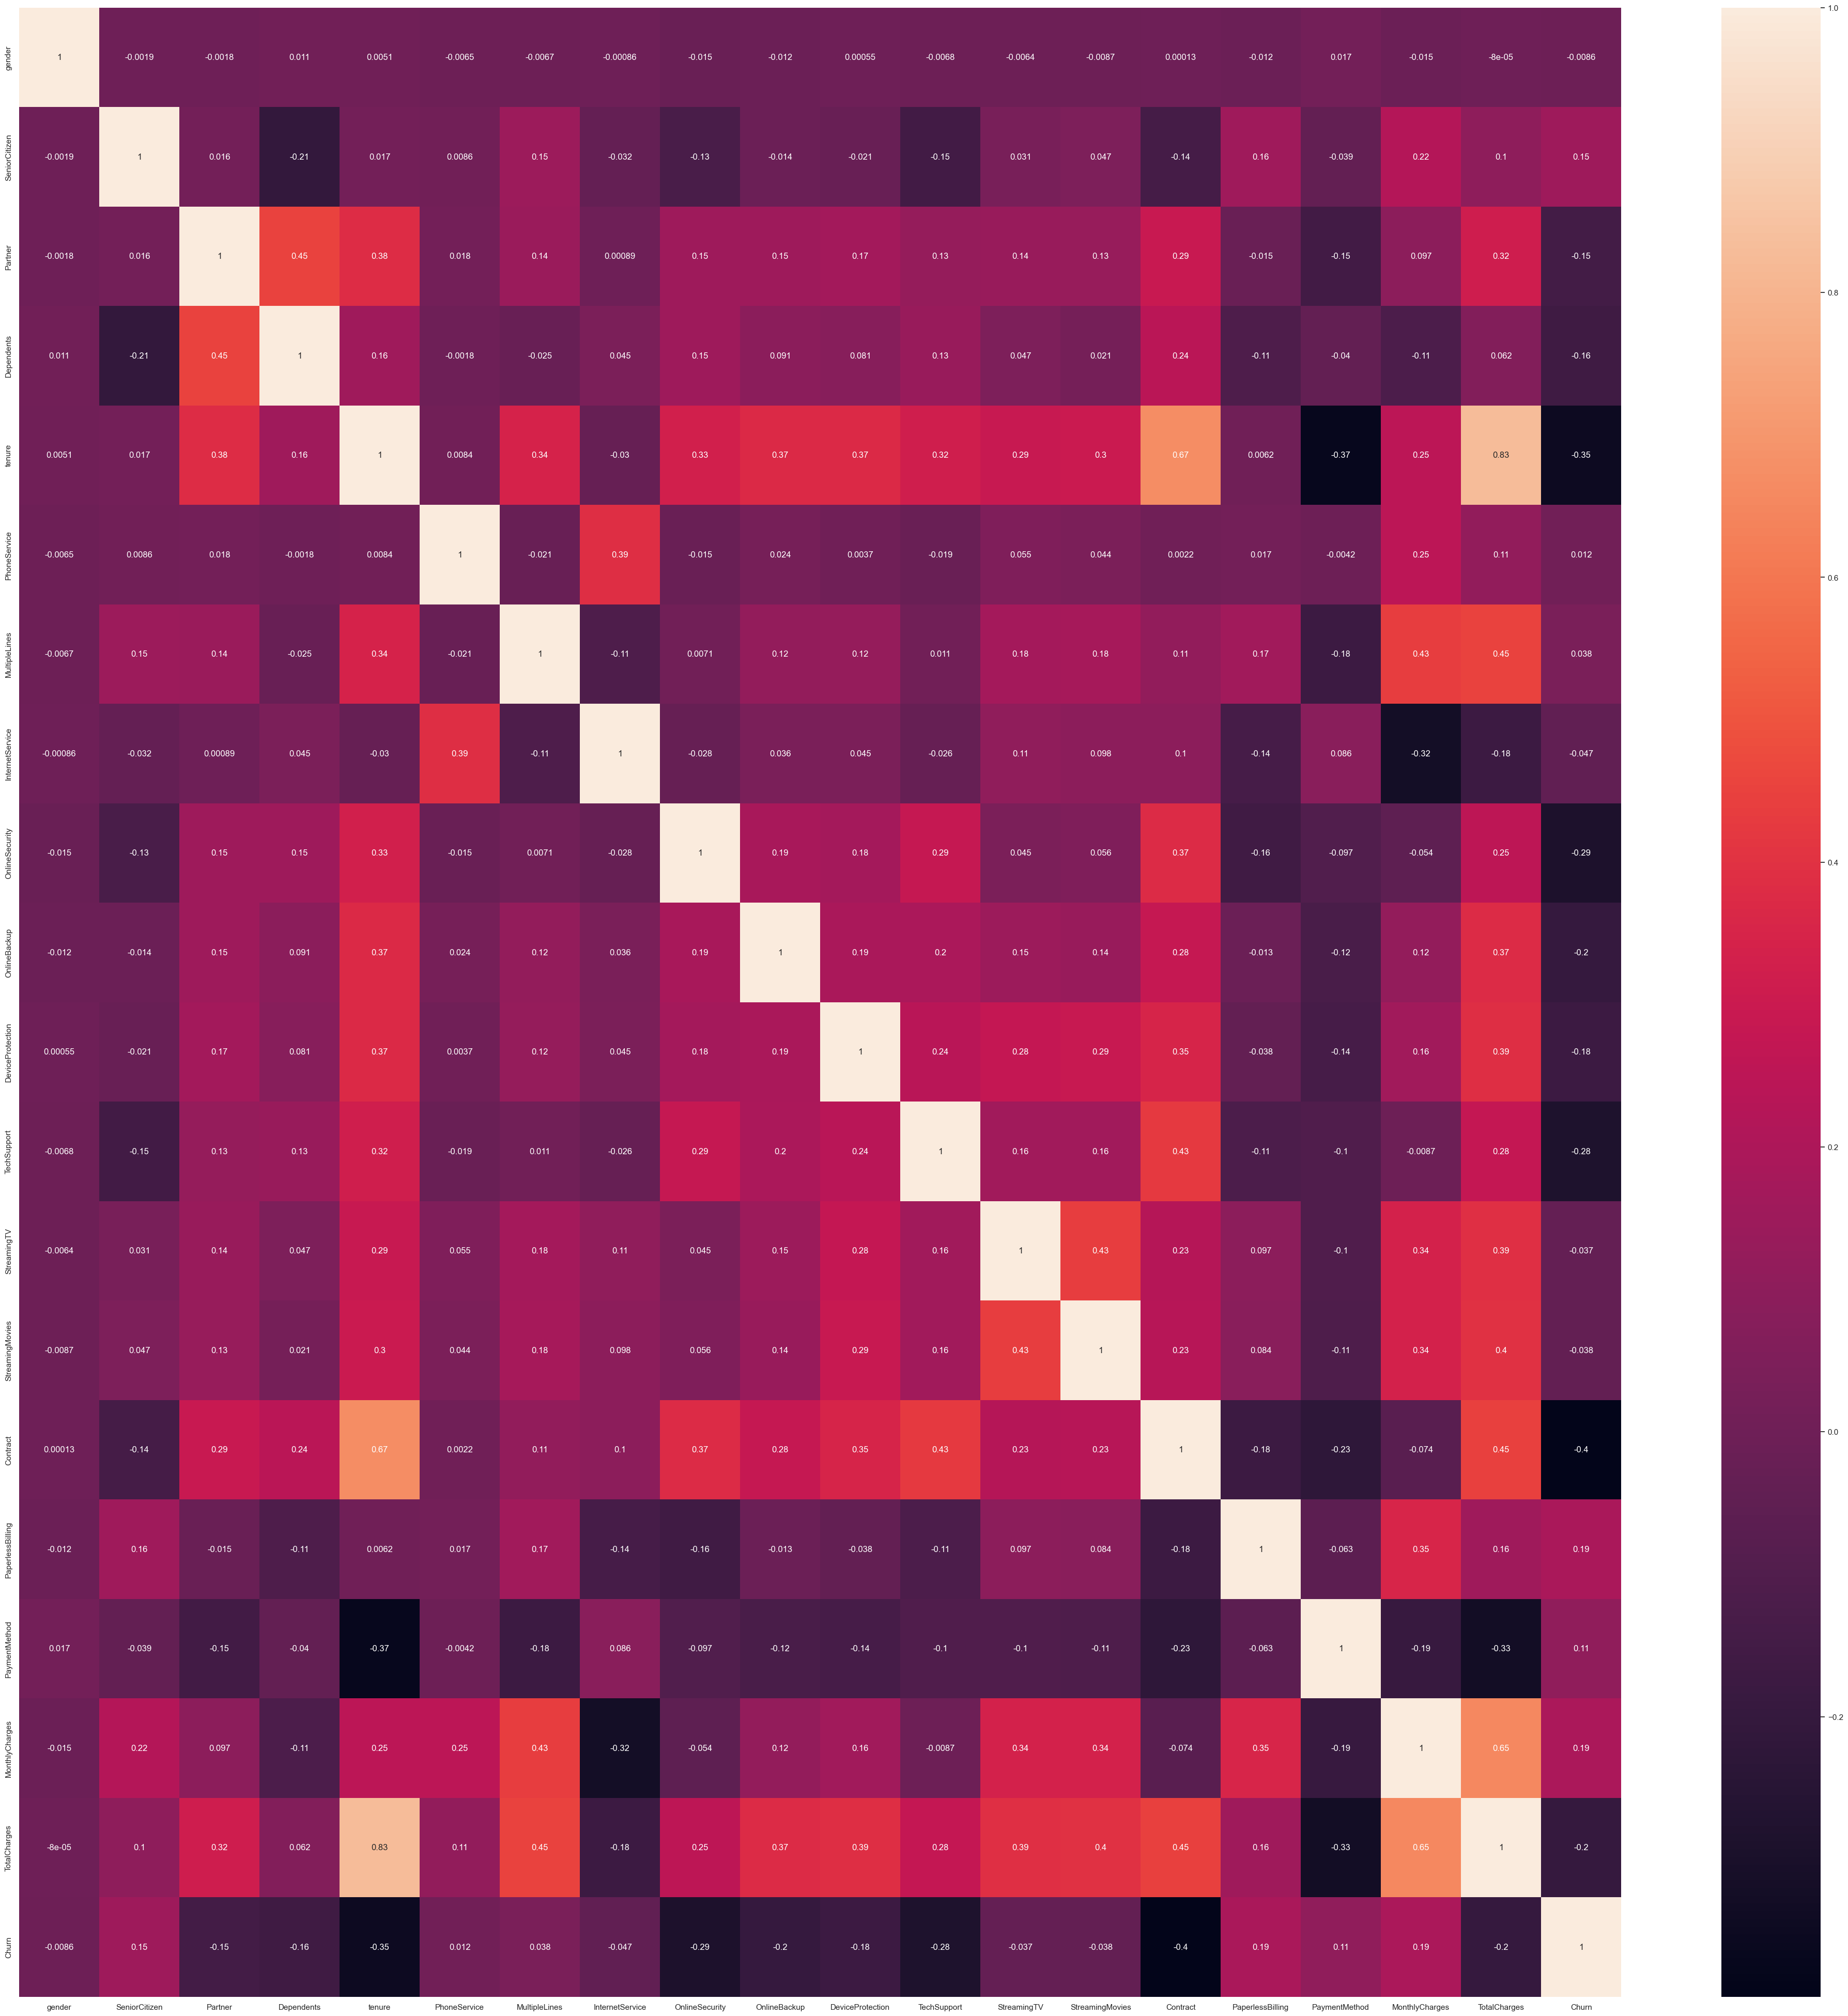

In [34]:
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True,fmt='.2g')

## Train Test Split

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [37]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


## Remove Outlier from Train Data using Z-Score

In [38]:
from scipy import stats
selected_columns=['tenure','MonthlyCharges','TotalCharges']
threshold=3
z_scores=np.abs(stats.zscore(X_train[selected_columns]))
outlier_indices=np.where(z_scores>threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

## Decision Tree Classifier
- Model devlopement : X_train, Y_train

- Predictions on : X_test

- Metrics: Predictions and Y_test

### 𝑆𝑡𝑒𝑝−1: Model development

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dt=dtree.predict(X_test)

### 𝑆𝑡𝑒𝑝−3: Metrics

In [41]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt)*100,2)
precision_dt=round(precision_score(y_test,y_pred_dt)*100,2)
recall_dt=round(recall_score(y_test,y_pred_dt)*100,2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

accuray is: 72.6
F1 is: 48.94
Precision is: 47.68
Recall is: 50.27


In [42]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.48      0.50      0.49       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



838 203 183 185


<Axes: >

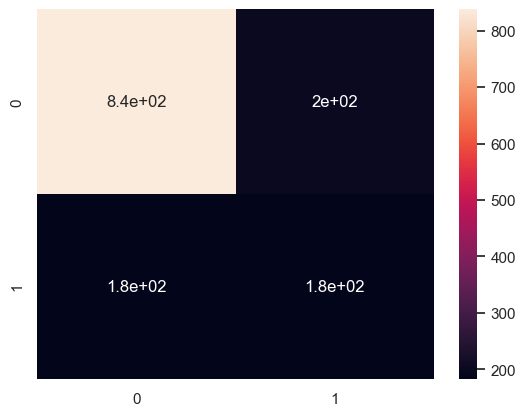

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cmt=confusion_matrix(y_test,y_pred_dt)
tn,fp,fn,tp=cmt.ravel()
print(tn,fp,fn,tp)
sns.heatmap(cmt,annot=True)

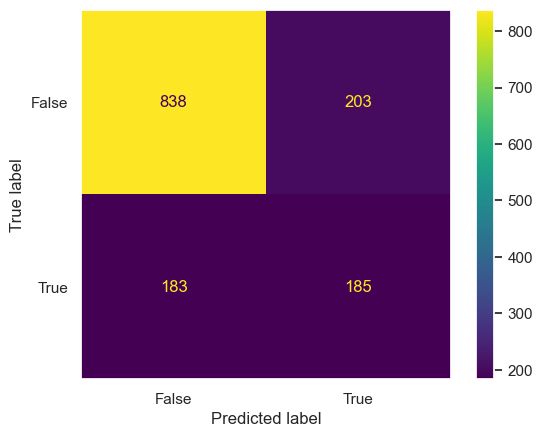

In [44]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
cmd.plot()
plt.grid(False)


#### ROC-AUC curve

- Consider there are two classes are there
- for every observations it will give probabilities
- Whcih ever is the highest probability that class will be the output

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/220px-Roc_curve.svg.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb pT0Scc KAlRDb" alt="Receiver operating characteristic - Wikipedia" data-noaft="1" style="width: 220px; height: 220px; margin: 0px;">

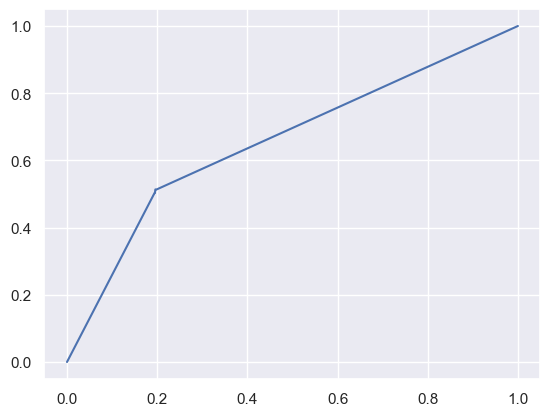

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve
probs=dtree.predict_proba(X_test)
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

### Logistic Regression
- With out Hyper parameter Tuning

In [46]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression(max_iter=1000000)
logtree.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [47]:
y_pred_log=logtree.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log)*100,2)
precision_log=round(precision_score(y_test,y_pred_log)*100,2)
recall_log=round(recall_score(y_test,y_pred_log)*100,2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 79.49
F1 is: 57.93
Precision is: 62.38
Recall is: 54.08


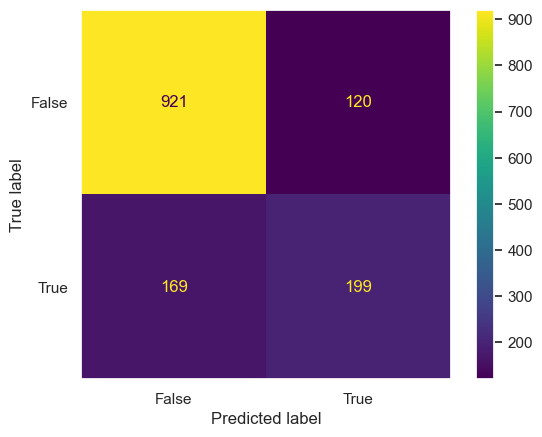

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)

In [50]:
tn,fp,fn,tp=cmt.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


True negative: 921
False postive: 120
False negative: 169
True postive: 199


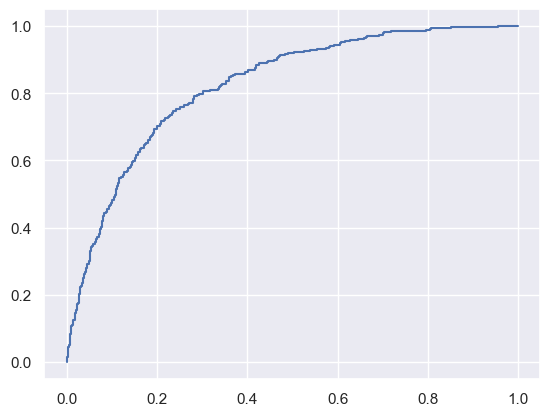

In [51]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob)
plt.plot(fpr,tpr)
plt.show()

### Naive Bayes
- With out hyperaparameter tuning

In [52]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [53]:
y_pred_NB=NBtree.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB)*100,2)
precision_NB=round(precision_score(y_test,y_pred_NB)*100,2)
recall_NB=round(recall_score(y_test,y_pred_NB)*100,2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 73.74
F1 is: 58.61
Precision is: 49.81
Recall is: 71.2


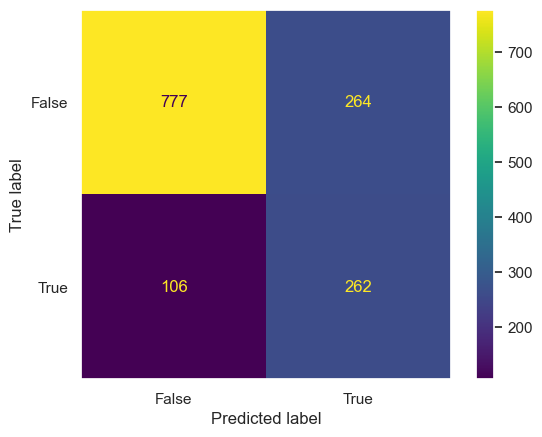

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)

In [56]:
tn,fp,fn,tp=cmt.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


True negative: 777
False postive: 264
False negative: 106
True postive: 262


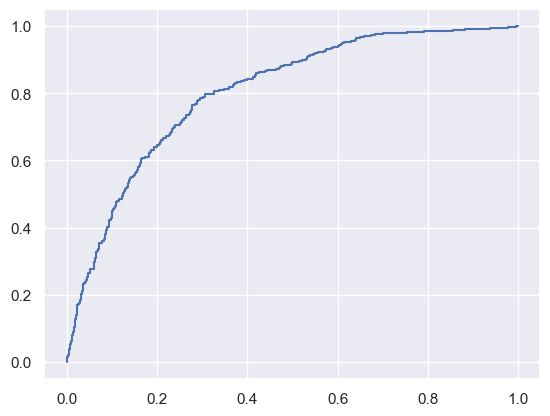

In [57]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

### Random Forest
- With out hyper pramater tuning




In [58]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_RF=RFtree.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF)*100,2)
precision_RF=round(precision_score(y_test,y_pred_RF)*100,2)
recall_RF=round(recall_score(y_test,y_pred_RF)*100,2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)


accuray is: 78.0
F1 is: 52.74
Precision is: 60.07
Recall is: 47.01


In [61]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)
tn,fp,fn,tp=cmt.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 926
False postive: 115
False negative: 195
True postive: 173


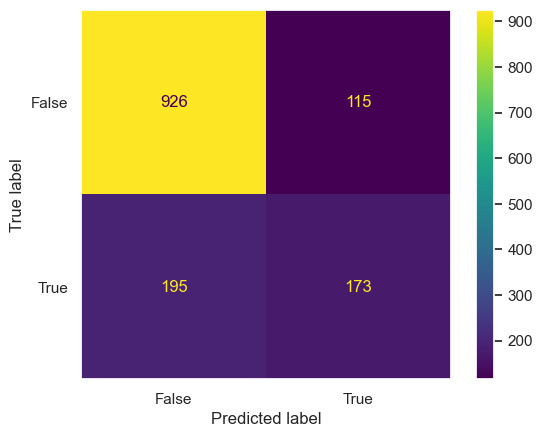

In [62]:
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)

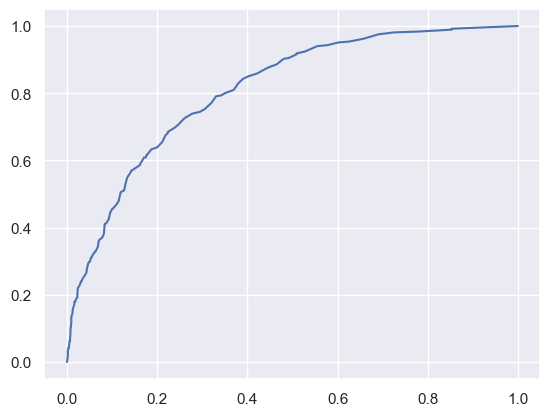

In [63]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()


In [67]:
dict1={'Accuracy':[acc_dt,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_log,f1_NB,f1_RF]}
pd.DataFrame(dict1,index=['DT','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,72.60,47.68,50.27,48.94
Logistic,79.49,62.38,54.08,57.93
Naive Bayes,73.74,49.81,71.20,58.61
Random Forest,78.00,60.07,47.01,52.74
